## Powell's Method

In [1]:
##finding the optimum x using Powell's method from scipy library
##https://docs.scipy.org/doc/scipy/reference/optimize.minimize-powell.html

def f(x):
    return x**2 + (25/x)

from scipy import optimize
optimize.minimize(f, 3, method='Powell')

   direc: array([[1.]])
     fun: array(16.15826018)
 message: 'Optimization terminated successfully.'
    nfev: 23
     nit: 2
  status: 0
 success: True
       x: array(2.32078852)

## Newton Method for single variable

In [2]:
%reset -f

##https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

def f(x):
    return x**2 + (25/x)

def df(x):
    return 2*x - (25/x**2)

from scipy import optimize
optimize.newton(df,3)

2.320794416806389

In [2]:
%reset -f 

def f(x):
    return 2*x - (25/x**2)

## evaluate the first derivative of a given function
##, f - function, x - variable, h - step size
def df_finite_difference(f, x, h=.000000001):
    return (f(x+h) - f(x)) / h

##Algorithm of Newton's method for single variable function, tol - tolerance
def newton(f, x, tol=1e-3):
    steps = 0
 
    while abs(f(x)) > tol:
        df = df_finite_difference(f, x)
        x = x - f(x)/df
        steps = steps + 1
    return x, steps
 
root, steps = newton(f, 8)
print ("root is:", root, "and the number of steps taken:", steps)

root is: 2.320688982734228 and the number of steps taken: 7


## Secant Method

In [4]:
%reset -f 
def f(x):
    return 2*x - (25/x**2)

def secant(f, x0, x1, max_iter=1000, tol = 1e-5):
    steps = 1
    while steps < max_iter and abs(x1-x0) > tol:
        x2 = x1 - ( (f(x1) * (x1 - x0)) / (f(x1) - f(x0)) )
        x1, x0 = x2, x1
        steps = steps + 1
    return x2, steps
  
root, steps = secant(f, 1, 5)
print ("root is:", root, "and the number of steps taken:", steps)

root is: 2.320794416807632 and the number of steps taken: 10


## Bisection Method

In [5]:
%reset -f 
##https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html
def f(x):
    return x**2 + (25/x)

def df(x):
    return 2*x - (25/x**2)

from scipy import optimize
optimize.bisect(df, 1, 5)

2.320794416807985

## Plotting Himmelblau function

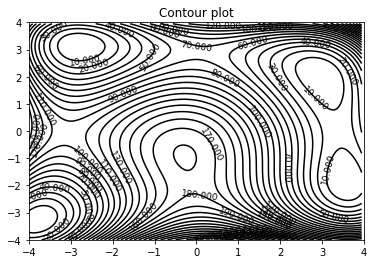

In [7]:
%reset -f 

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

x = np.arange(-4, 4, 0.05)
y = np.arange(-4, 4, 0.05)
X, Y = meshgrid(x, y)
Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2


##https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
Cont = plt.contour(X, Y, Z, colors='black',levels=30)
##labelling a contour plot using clabel
plt.clabel(Cont, inline=0, fontsize=9)
plt.title('Contour plot')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()

## Steepest Descent Method

In [7]:
%reset -f 
import numpy as np
import numpy.linalg as la
import scipy.optimize as sopt

def f(x):
    return (3-x[0]**2)**2 + (2-x[1]**2)**2
def df(x):
    return np.array([-4.*x[0]*(3.-x[0]**2), -4.*x[1]*(2.-x[1]**2)])

x_initial = [np.array([1, 1])]
print(x_initial)
x = x_initial[-1]
print(x)
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)
##using golden section method to find optimum alpha(learning rate)
alpha_optimum = sopt.golden(f1d)
x_new = x + alpha_optimum * s
x_initial.append(x_new)

print("Iteration 1 is: ", x_new)

##starting iteration 2
x = x_initial[-1]
s = -df(x)
alpha_optimum = sopt.golden(f1d)
x_new = x + alpha_optimum * s
x_initial.append(x_new)
print("Iteration 2 is: ", x_new)

[array([1, 1])]
[1 1]
Iteration 1 is:  [1.74517076 1.37258538]
Iteration 2 is:  [1.72645446 1.41001797]


In [1]:
##Gradient Descent Method
%reset -f 

from numpy import *
from numpy.linalg import norm

def f(x, y):
    return (3-x**2)**2 + (2-y**2)**2

def dfdx(x, y):
    return -4.*x*(3.-x**2)
    
def dfdy(x, y):
    return -4.*y*(2.-y**2)

def gradf(x, y):
    return array([dfdx(x, y), dfdy(x, y)]) 

def gradient_descent(f, gradf, z_init, alpha):
    tol = 1e-5
    z_old = z_init-10*tol
    z = z_init.copy()
    z = z.astype('float32')

    
    max_iter = 1000
    iter = 0
    ## z_old, z_init and z are the vectors
    while norm(z - z_old) > tol and iter < max_iter:
        z_old = z.copy()
        z -= alpha*gradf(z[0], z[1])
        print (z, f(z[0], z[1]), gradf(z[0], z[1]))
        iter = iter + 1
    
    return z

gradient_descent(f, gradf, array([1, 1]), 0.01)

[1.08 1.04] 4.205547325803228 [-7.92115191 -3.82054419]
[1.1592115 1.0782053] 3.444454785414467 [-7.67967735 -3.61187246]
[1.2360083 1.1143241] 2.7426100633536676 [-7.2790185  -3.37988679]
[1.3087984 1.1481229] 2.1213591597654147 [-6.73793862 -3.13122413]
[1.3761778 1.1794351] 1.5943330787197874 [-6.088952   -2.87278679]
[1.4370673 1.208163 ] 1.165891047546242 [-5.37369842 -2.61128543]
[1.4908042 1.2342758] 0.8316231720186439 [-4.63641805 -2.35284176]
[1.5371684 1.2578043] 0.5805775873787566 [-3.91740206 -2.10268855]
[1.5763425 1.2788311] 0.39830035662110624 [-3.24817621 -1.86500105]
[1.6088243 1.2974812] 0.26968335720907505 [-2.64931218 -1.64283221]
[1.6353173 1.3139095] 0.1809845572993588 [-2.13073504 -1.43816199]
[1.6566247 1.3282912] 0.12085605395742237 [-1.69369786 -1.25200767]
[1.6735617 1.3408113] 0.08057218438114375 [-1.33343546 -1.08458321]
[1.6868961 1.351657 ] 0.05377072746968828 [-1.04170284 -0.93547245]
[1.6973131 1.3610117] 0.03599120835294101 [-0.80879236 -0.80379739]
[1

array([1.7320504, 1.4141688], dtype=float32)

## Newton's Method for Multivariables

In [9]:
%reset -f 

def f(x):

    return (3-x[0] ** 2)**2 + (2-x[1] ** 2)**2

import autograd.numpy as np
import autograd


def newton(f, x0, tol=1e-3, max_iter=1000):
    g = autograd.grad(f)
    h = autograd.hessian(f)

    x = x0
    for _ in range(max_iter):
        delta = np.linalg.solve(h(x), -g(x)) ##to get the alpha(delta)
        x = x + delta
        if np.linalg.norm(delta) < tol:
            break

    return x

x0 = np.array([1.5, 1.25])

print(newton(f, x0))

[1.73205081 1.41421356]
